#### This is an exact copy of cifar10.py script

In [19]:
import sys
import time
import pickle
import os
import pandas as pd
sys.path.append("..")
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

from helper import object_map
from helper import ModelWrapper
from helper import simple_dense_model, simple_conv_model, conv_model, residual_model, bottleneck_model
from utils import plot_history

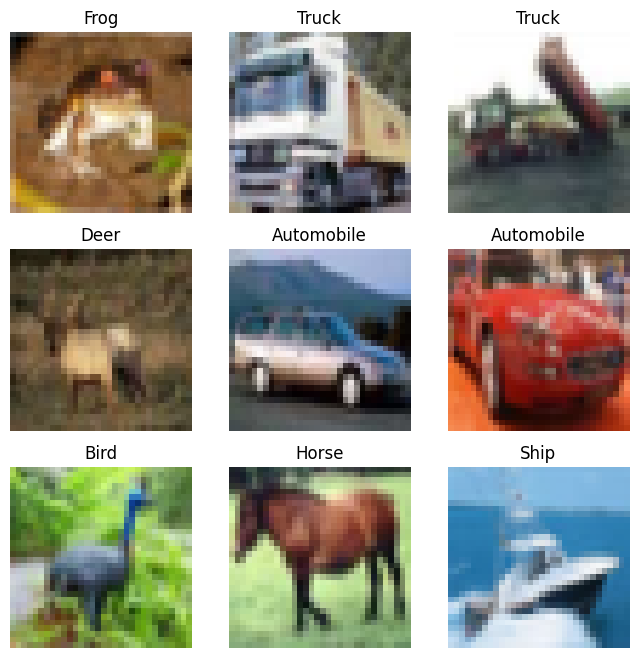

In [2]:
# Download the data and split test set to validation and test set
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
X_valid, X_test, y_valid, y_test = train_test_split(X_test, 
                                                    y_test, 
                                                    test_size=0.5, 
                                                    stratify=y_test, 
                                                    random_state=47)

BATCH_SIZE = 512
IMG_SHAPE = X_train.shape[1:]

test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(BATCH_SIZE)

# Show a small sample of the dataset
plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.title(object_map[y_train[i][0]])
    plt.imshow(X_train[i])
    plt.axis("off")
plt.show()

In [3]:
# Create the statistics object if it doesn't exist
if not os.path.exists(os.path.join(os.getcwd(), "statistics.pkl")):
    statistics = {}
    statistics["accuracies"] = {}
    statistics["val_accuracies"] = {}
    statistics["training_times"] = {}
    statistics["test_accuracies"] = {}

    with open("statistics.pkl", "wb") as f:
        pickle.dump(statistics, f)

#### Simple Dense Model

Starting training


2023-05-11 12:36:22.010023: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7f083bbdc7b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-05-11 12:36:22.010051: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 2060 SUPER, Compute Capability 7.5
2023-05-11 12:36:22.013140: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-05-11 12:36:22.064286: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-05-11 12:36:22.103402: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Epoch number 0, training time: 2.03s -->  loss: 1.9310, accuracy: 0.2967, val_loss: 1.7404, val_accuracy: 0.3758
Epoch number 1, training time: 0.23s -->  loss: 1.6946, accuracy: 0.3919, val_loss: 1.6189, val_accuracy: 0.4222
Epoch number 2, training time: 0.21s -->  loss: 1.6085, accuracy: 0.4258, val_loss: 1.5795, val_accuracy: 0.4420
Epoch number 3, training time: 0.2s -->  loss: 1.5496, accuracy: 0.4459, val_loss: 1.5112, val_accuracy: 0.4682
Epoch number 4, training time: 0.22s -->  loss: 1.4967, accuracy: 0.4660, val_loss: 1.4880, val_accuracy: 0.4756
Epoch number 5, training time: 0.21s -->  loss: 1.4542, accuracy: 0.4817, val_loss: 1.4507, val_accuracy: 0.4844
Epoch number 6, training time: 0.2s -->  loss: 1.4158, accuracy: 0.4952, val_loss: 1.4358, val_accuracy: 0.4906
Epoch number 7, training time: 0.23s -->  loss: 1.3721, accuracy: 0.5120, val_loss: 1.3952, val_accuracy: 0.5040
Epoch number 8, training time: 0.21s -->  loss: 1.3359, accuracy: 0.5266, val_loss: 1.3990, val_ac

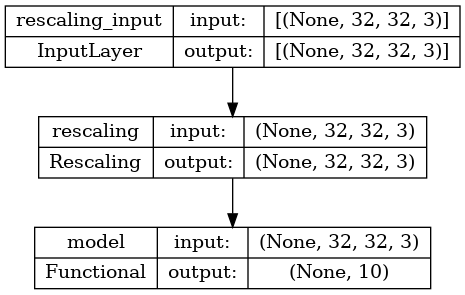

In [4]:
# Load statistics object
with open("statistics.pkl", "rb") as f:
    statistics = pickle.load(f)
    
# Get the simple dense model
model_den = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    simple_dense_model(shape=IMG_SHAPE)
])

# Compile and train the model
wrap_simple_den = ModelWrapper(model_den, tf.keras.optimizers.Adamax(learning_rate=0.001))

t_start = time.time()
history_dense = wrap_simple_den.fit(X_train, 
                    y_train, 
                    batch_size=BATCH_SIZE, 
                    epochs=25, 
                    validation_data=(X_valid,y_valid),
                    )
t_end = time.time() - t_start

statistics["training_times"]["simple_dense"] = t_end
statistics["accuracies"]["simple_dense"] = history_dense["accuracy"]
statistics["val_accuracies"]["simple_dense"] = history_dense["val_accuracy"]
statistics["test_accuracies"]["simple_dense"] = wrap_simple_den.evaluate(test_ds, best=True).split()[-1]

# Save statistics
with open("statistics.pkl", "wb") as f:
    pickle.dump(statistics, f)

tf.keras.utils.plot_model(wrap_simple_den.get_model(), show_shapes=True)

<Figure size 1400x1000 with 0 Axes>

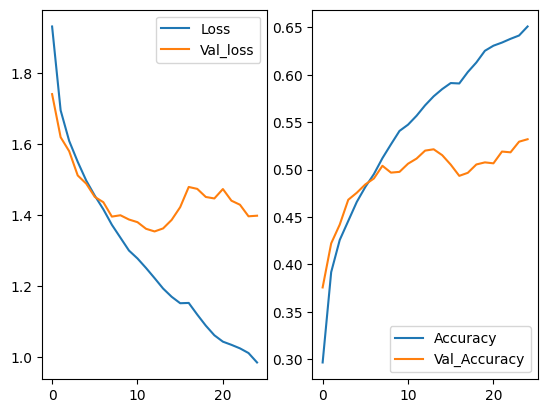

In [7]:
# Plot training
plot_history(
    (history_dense["loss"],
     history_dense["val_loss"],
     history_dense["accuracy"],
     history_dense["val_accuracy"])
)

#### Simple Convolutional model

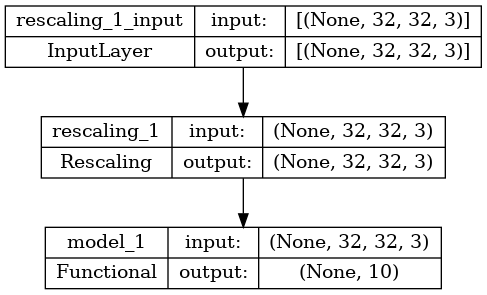

In [9]:
# Load statistics object
with open("statistics.pkl", "rb") as f:
    statistics = pickle.load(f)
        
# %% Simple convolutional model
model_simple_conv = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    simple_conv_model(shape=IMG_SHAPE)
])

# Compile and train the model
wrap_simple_conv = ModelWrapper(model_simple_conv, tf.keras.optimizers.Adamax(learning_rate=0.001))

t_start = time.time()
history_simple_conv = wrap_simple_conv.fit(X_train, 
                    y_train, 
                    batch_size=BATCH_SIZE, 
                    epochs=25, 
                    validation_data=(X_valid,y_valid),
                    )
t_end = time.time() - t_start

statistics["training_times"]["simple_conv"] = t_end
statistics["accuracies"]["simple_conv"] = history_simple_conv["accuracy"]
statistics["val_accuracies"]["simple_conv"] = history_simple_conv["val_accuracy"]
statistics["test_accuracies"]["simple_conv"] = wrap_simple_conv.evaluate(test_ds, best=True).split()[-1]

# Save statistics
with open("statistics.pkl", "wb") as f:
    pickle.dump(statistics, f)

tf.keras.utils.plot_model(wrap_simple_conv.get_model(), show_shapes=True)

<Figure size 1400x1000 with 0 Axes>

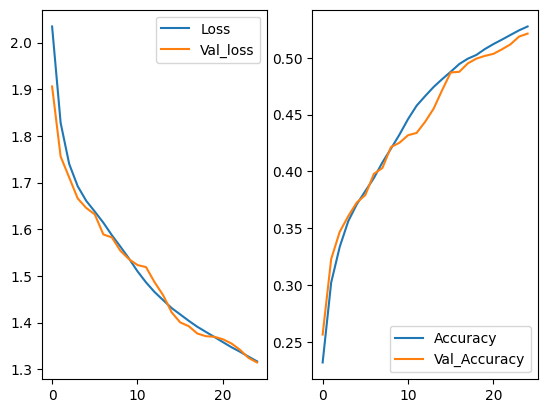

In [10]:

# Plot training
plot_history(
    (history_simple_conv["loss"],
     history_simple_conv["val_loss"],
     history_simple_conv["accuracy"],
     history_simple_conv["val_accuracy"])
)

#### Optimized convolutional model

Starting training


2023-05-11 12:45:05.234715: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_2/model_2/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2023-05-11 12:45:18.192488: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_2/model_2/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


Epoch number 0, training time: 14.17s -->  loss: 2.5273, accuracy: 0.2386, val_loss: 2.3238, val_accuracy: 0.1000
Epoch number 1, training time: 10.14s -->  loss: 1.9777, accuracy: 0.3290, val_loss: 2.3078, val_accuracy: 0.1666
Epoch number 2, training time: 10.65s -->  loss: 1.7615, accuracy: 0.3789, val_loss: 2.2977, val_accuracy: 0.1772
Epoch number 3, training time: 10.36s -->  loss: 1.6047, accuracy: 0.4256, val_loss: 2.0335, val_accuracy: 0.2534
Epoch number 4, training time: 10.12s -->  loss: 1.4912, accuracy: 0.4659, val_loss: 1.7175, val_accuracy: 0.3544
Epoch number 5, training time: 10.88s -->  loss: 1.3938, accuracy: 0.5003, val_loss: 1.4092, val_accuracy: 0.4928
Epoch number 6, training time: 10.85s -->  loss: 1.3099, accuracy: 0.5291, val_loss: 1.2727, val_accuracy: 0.5242
Epoch number 7, training time: 10.29s -->  loss: 1.2498, accuracy: 0.5568, val_loss: 1.1740, val_accuracy: 0.5768
Epoch number 8, training time: 9.94s -->  loss: 1.1940, accuracy: 0.5772, val_loss: 1.11

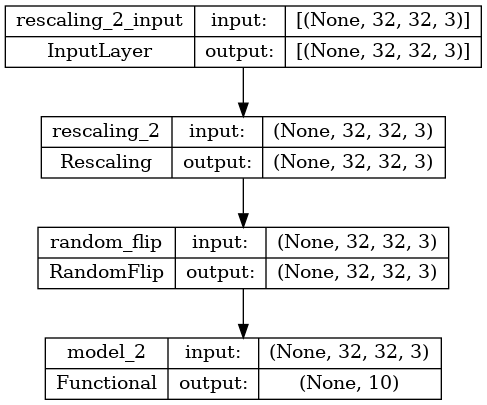

In [11]:
# Load statistics object
with open("statistics.pkl", "rb") as f:
    statistics = pickle.load(f)
        
# %% Optimized convolutional model
model_opt_conv = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.RandomFlip("horizontal"),
    conv_model(shape=IMG_SHAPE)
])

# Compile and train the model
wrap_opt_conv = ModelWrapper(model_opt_conv, tf.keras.optimizers.Adamax(learning_rate=0.001))

t_start = time.time()
history_opt_conv = wrap_opt_conv.fit(X_train, 
                    y_train, 
                    batch_size=BATCH_SIZE, 
                    epochs=25, 
                    validation_data=(X_valid,y_valid),
                    )
t_end = time.time() - t_start

statistics["training_times"]["opt_conv"] = t_end
statistics["accuracies"]["opt_conv"] = history_opt_conv["accuracy"]
statistics["val_accuracies"]["opt_conv"] = history_opt_conv["val_accuracy"]
statistics["test_accuracies"]["opt_conv"] = wrap_opt_conv.evaluate(test_ds, best=True).split()[-1]

# Save statistics
with open("statistics.pkl", "wb") as f:
    pickle.dump(statistics, f)
    
tf.keras.utils.plot_model(wrap_opt_conv.get_model(), show_shapes=True)

<Figure size 1400x1000 with 0 Axes>

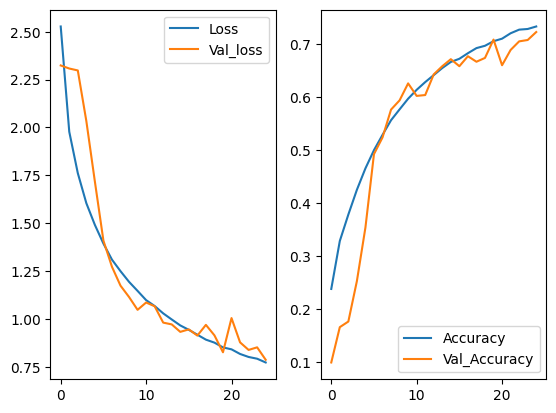

In [12]:
# Plot training
plot_history(
    (history_opt_conv["loss"],
     history_opt_conv["val_loss"],
     history_opt_conv["accuracy"],
     history_opt_conv["val_accuracy"])
)

#### Residual convolutional model

In [ ]:
# Load statistics object
with open("statistics.pkl", "rb") as f:
    statistics = pickle.load(f)
    
# %% Residual convolutional model
model_resnet = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.RandomFlip("horizontal"),
    residual_model(shape=IMG_SHAPE)
])

# Compile and train the model
wrap_resnet = ModelWrapper(model_resnet, tf.keras.optimizers.Adamax(learning_rate=0.001))

t_start = time.time()
history_resnet = wrap_resnet.fit(X_train, 
                    y_train, 
                    batch_size=BATCH_SIZE, 
                    epochs=25, 
                    validation_data=(X_valid,y_valid),
                    )
t_end = time.time() - t_start

statistics["training_times"]["res_conv"] = t_end
statistics["accuracies"]["res_conv"] = history_resnet["accuracy"]
statistics["val_accuracies"]["res_conv"] = history_resnet["val_accuracy"]
statistics["test_accuracies"]["res_conv"] = wrap_resnet.best_evaluate(X_test, y_test).split()[-1]

# Save statistics
with open("statistics.pkl", "wb") as f:
    pickle.dump(statistics, f)

tf.keras.utils.plot_model(wrap_resnet.get_model(), show_shapes=True)

In [ ]:
# Plot training
plot_history(
    (history_resnet["loss"],
     history_resnet["val_loss"],
     history_resnet["accuracy"],
     history_resnet["val_accuracy"])
)

#### Bottleneck model

Starting training


2023-05-11 13:03:35.599619: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8101
2023-05-11 13:03:35.943145: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-05-11 13:03:37.055084: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.34GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-05-11 13:03:37.055110: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.34GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-05-11 13:03:37.108537: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate

Epoch number 0, training time: 41.01s -->  loss: 1.5873, accuracy: 0.4262, val_loss: 2.7644, val_accuracy: 0.1142
Epoch number 1, training time: 35.06s -->  loss: 1.2775, accuracy: 0.5452, val_loss: 3.4551, val_accuracy: 0.1108
Epoch number 2, training time: 35.48s -->  loss: 1.1407, accuracy: 0.5945, val_loss: 3.7553, val_accuracy: 0.1260
Epoch number 3, training time: 33.64s -->  loss: 1.0480, accuracy: 0.6300, val_loss: 3.6544, val_accuracy: 0.1572
Epoch number 4, training time: 34.45s -->  loss: 0.9759, accuracy: 0.6561, val_loss: 2.9153, val_accuracy: 0.2238
Epoch number 5, training time: 34.54s -->  loss: 0.9179, accuracy: 0.6781, val_loss: 1.9029, val_accuracy: 0.3732
Epoch number 6, training time: 34.54s -->  loss: 0.8700, accuracy: 0.6955, val_loss: 1.3346, val_accuracy: 0.5266
Epoch number 7, training time: 34.35s -->  loss: 0.8288, accuracy: 0.7093, val_loss: 1.2534, val_accuracy: 0.5712
Epoch number 8, training time: 33.33s -->  loss: 0.7906, accuracy: 0.7229, val_loss: 1.0

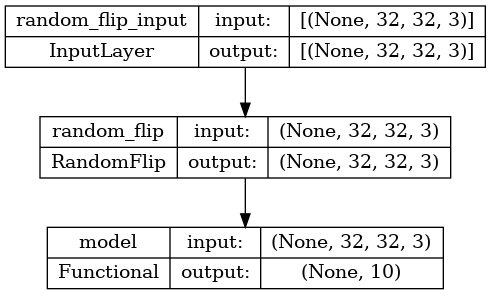

In [5]:
# Load statistics object
with open("statistics.pkl", "rb") as f:
    statistics = pickle.load(f)
        
# %% Bottleneck model
model_bottleneck = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    bottleneck_model(shape=IMG_SHAPE)
])

wrap_bottleneck = ModelWrapper(model_bottleneck, tf.keras.optimizers.Adamax(learning_rate=0.001))

t_start = time.time()
history_bottleneck = wrap_bottleneck.fit(X_train, 
                    y_train, 
                    batch_size=BATCH_SIZE, 
                    epochs=25, 
                    validation_data=(X_valid,y_valid),
                    )
t_end = time.time() - t_start

statistics["training_times"]["bottle_conv"] = t_end
statistics["accuracies"]["bottle_conv"] = history_bottleneck["accuracy"]
statistics["val_accuracies"]["bottle_conv"] = history_bottleneck["val_accuracy"]
statistics["test_accuracies"]["bottle_conv"] = wrap_bottleneck.evaluate(test_ds, best=True).split()[-1]

# Save statistics
with open("statistics.pkl", "wb") as f:
    pickle.dump(statistics, f)
    
tf.keras.utils.plot_model(wrap_bottleneck.get_model(), show_shapes=True)

<Figure size 1400x1000 with 0 Axes>

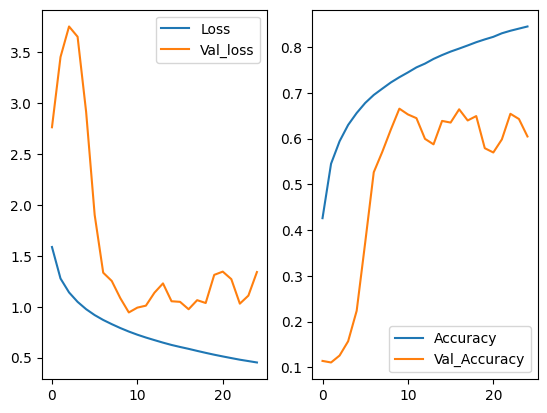

In [6]:
# Plot training
plot_history(
    (history_bottleneck["loss"],
     history_bottleneck["val_loss"],
     history_bottleneck["accuracy"],
     history_bottleneck["val_accuracy"])
)

### Putting it all together

In [17]:
statistics.keys()

dict_keys(['accuracies', 'val_accuracies', 'training_times', 'test_accuracies'])

In [24]:
stat_df = pd.DataFrame([statistics["training_times"], statistics["test_accuracies"]]).T.rename(columns={0: "Training time", 1: "Test accuracy"})
stat_df["Test accuracy"] = stat_df["Test accuracy"].astype(float).map(lambda x: round(x, 4))
stat_df

,Training time,Test accuracy
simple_dense,8.319246,0.5246
simple_conv,186.839727,0.5252
opt_conv,287.499853,0.7200
bottle_conv,903.364418,0.6770


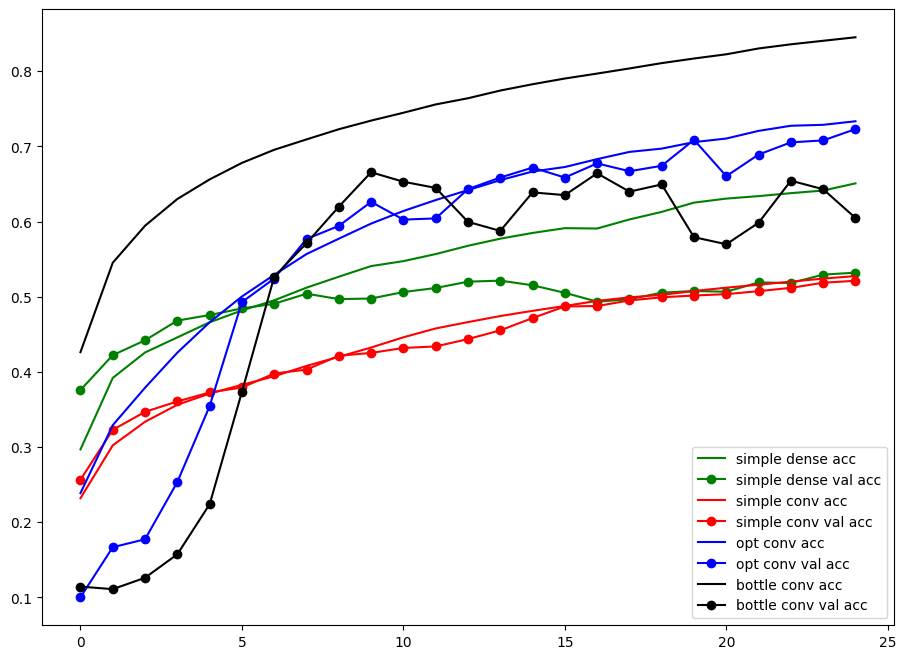

In [16]:
plt.figure(figsize=(11,8))
plt.plot(statistics["accuracies"]["simple_dense"], color="green", label="simple dense acc")
plt.plot(statistics["val_accuracies"]["simple_dense"], marker="o", color="green", label="simple dense val acc")
plt.plot(statistics["accuracies"]["simple_conv"], color="red", label="simple conv acc")
plt.plot(statistics["val_accuracies"]["simple_conv"], marker="o", color="red", label="simple conv val acc")
plt.plot(statistics["accuracies"]["opt_conv"], color="blue", label="opt conv acc")
plt.plot(statistics["val_accuracies"]["opt_conv"], marker="o", color="blue", label="opt conv val acc")
plt.plot(statistics["accuracies"]["bottle_conv"], color="black", label="bottle conv acc")
plt.plot(statistics["val_accuracies"]["bottle_conv"], marker="o", color="black", label="bottle conv val acc")
plt.legend()
plt.show()